# Классификация с помощью алгоритма KNN


In [482]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn
%matplotlib inline

# Информация о датасете

Датасет содержит содержит информацию о доступных вакансиях. Цель: определить настоящая ли это вакансия.

Описание с сайта источника:

This dataset contains 18K job descriptions out of which about 800 are fake. The data consists of both textual information and meta-information about the jobs. The dataset can be used to create classification models which can learn the job descriptions which are fraudulent.

# Загрузка Данных

In [483]:
df = pd.read_csv("fake_job_postings.csv")
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


Исходные столбцы:

In [484]:
print(*df.columns, sep=", ")

job_id, title, location, department, salary_range, company_profile, description, requirements, benefits, telecommuting, has_company_logo, has_questions, employment_type, required_experience, required_education, industry, function, fraudulent


# Предобработка данных


In [485]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [486]:
for i in df.columns.tolist():
    if df[i].isnull().sum()>0:
        print('Feature',i,': {:.2f}%'.format(df[i].isnull().sum()*100/len(df[i])))

Feature location : 1.94%
Feature department : 64.58%
Feature salary_range : 83.96%
Feature company_profile : 18.50%
Feature description : 0.01%
Feature requirements : 15.07%
Feature benefits : 40.32%
Feature employment_type : 19.41%
Feature required_experience : 39.43%
Feature required_education : 45.33%
Feature industry : 27.42%
Feature function : 36.10%


In [487]:
df['title'].value_counts()

English Teacher Abroad                                                311
Customer Service Associate                                            146
Graduates: English Teacher Abroad (Conversational)                    144
English Teacher Abroad                                                 95
Software Engineer                                                      86
                                                                     ... 
2 Full-Time Caregivers for an Independent and Compassionate Woman       1
Graduate Client Engineer 2015                                           1
Liferay Portal [Portals]                                                1
Legal Collections Manager                                               1
Group Creative Director                                                 1
Name: title, Length: 11231, dtype: int64

In [488]:
df['location'].value_counts()

GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
US, ,                    339
                        ... 
GB, OLD, Oldham            1
GB, HEF, potters Bar       1
US, ND, Fargo              1
IN, RJ, Churu              1
PH, 14, Quezon City        1
Name: location, Length: 3105, dtype: int64

In [489]:
df['department'].value_counts()

Sales              551
Engineering        487
Marketing          401
Operations         270
IT                 225
                  ... 
CR                   1
Conferences i/o      1
Operators            1
IR                   1
ACES                 1
Name: department, Length: 1337, dtype: int64

In [490]:
df['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

<AxesSubplot:xlabel='telecommuting', ylabel='count'>

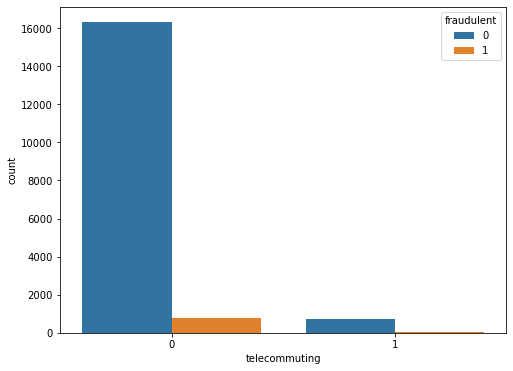

In [491]:
plt.figure(figsize=(8,6))
seaborn.countplot(x='telecommuting',hue='fraudulent',data=df)

<AxesSubplot:xlabel='telecommuting', ylabel='count'>

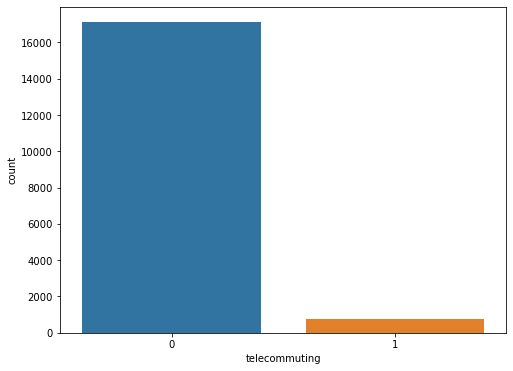

In [492]:
plt.figure(figsize=(8,6))
seaborn.countplot(x='telecommuting',data=df)

<AxesSubplot:xlabel='has_company_logo', ylabel='count'>

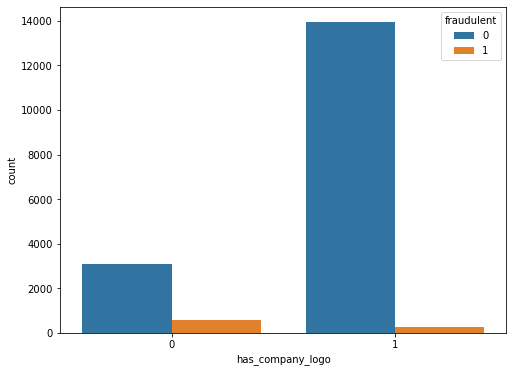

In [493]:
plt.figure(figsize=(8,6))
seaborn.countplot(x='has_company_logo',hue='fraudulent',data=df)

In [494]:
df['has_questions'].value_counts()

0    9088
1    8792
Name: has_questions, dtype: int64

<AxesSubplot:xlabel='has_questions', ylabel='count'>

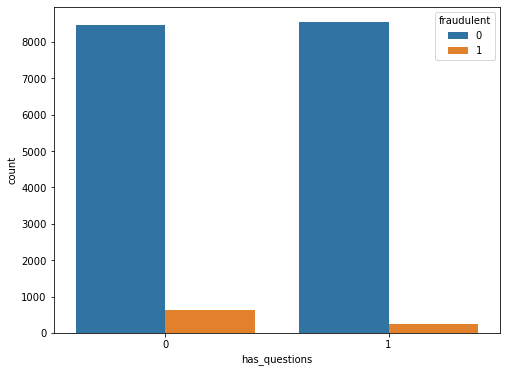

In [495]:
plt.figure(figsize=(8,6))
seaborn.countplot(x='has_questions',hue='fraudulent',data=df)

In [496]:
df['employment_type'].value_counts()

Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

In [497]:
df['employment_type'].isnull().sum()

3471

In [498]:
df.dropna(subset=['employment_type'],axis=0,inplace=True)

In [499]:
df['required_experience'].value_counts()

Mid-Senior level    3791
Entry level         2628
Associate           2277
Not Applicable      1013
Director             387
Internship           361
Executive            140
Name: required_experience, dtype: int64

In [500]:
df.dropna(subset=['required_experience'],axis=0,inplace=True)

In [501]:
df['required_education'].value_counts()

Bachelor's Degree                    4199
High School or equivalent            1850
Unspecified                          1316
Master's Degree                       328
Associate Degree                      250
Certification                         146
Some College Coursework Completed      95
Professional                           67
Vocational                             43
Doctorate                              25
Vocational - Degree                     6
Some High School Coursework             5
Vocational - HS Diploma                 4
Name: required_education, dtype: int64

In [502]:
df.dropna(subset=['required_education'],axis=0,inplace=True)

Удалю неинтересные столбцы

In [503]:
del_cols=['job_id','title','location','department','salary_range','company_profile','description','requirements','benefits','industry','function']

Заодно обработаю пропущенные данные

In [504]:
df=df.drop(del_cols,axis=1)
col_list=list(df.columns)

df

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0
6,0,1,1,Full-time,Mid-Senior level,Master's Degree,0
9,0,1,0,Part-time,Entry level,High School or equivalent,0
10,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,0
...,...,...,...,...,...,...,...
17867,0,1,0,Full-time,Entry level,Unspecified,0
17870,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0
17874,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,0
17876,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0


In [505]:
categorical=df.select_dtypes('object').columns.tolist()
categorical

['employment_type', 'required_experience', 'required_education']

In [506]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical:
    df[i]=le.fit_transform(df[i])

In [507]:
df.reset_index(drop=True,inplace=True)
df

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent
0,0,1,0,1,5,1,0
1,0,1,1,1,5,1,0
2,0,1,1,1,5,5,0
3,0,1,0,3,2,4,0
4,0,0,0,1,5,1,0
...,...,...,...,...,...,...,...
8329,0,1,0,1,2,9,0
8330,0,1,1,1,5,1,0
8331,0,0,0,1,5,1,0
8332,0,1,1,1,5,1,0


In [508]:
df.describe()



,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent
count,8334.000000,8334.000000,8334.000000,8334.000000,8334.000000,8334.00000,8334.000000
mean,0.051956,0.851092,0.524238,1.111951,2.987641,3.25186,0.043197
std,0.221951,0.356019,0.499442,0.674985,2.149510,2.98531,0.203311
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,1.000000,1.00000,0.000000
50%,0.000000,1.000000,1.000000,1.000000,2.000000,1.00000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,5.000000,4.00000,0.000000
max,1.000000,1.000000,1.000000,4.000000,6.000000,12.00000,1.000000



Можно вычислить матрицу корреляции, чтобы выявить возможные связи признаков между собой (а вернее, их отсутствие - ввиду тематики датасета большинство признаков являются совершенно независимыми "по определению").

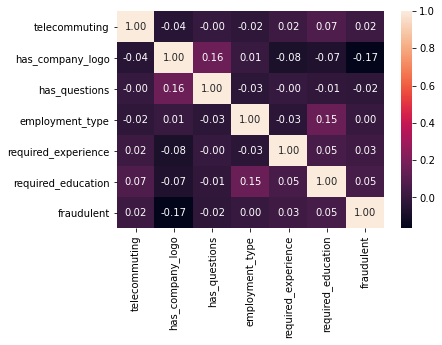

In [509]:
seaborn.heatmap(df.corr(),annot=True,fmt='.2f')
pass

In [510]:
df['fraudulent'].value_counts()

0    7974
1     360
Name: fraudulent, dtype: int64

In [511]:
df.to_csv('fake_job_data_lab2.csv')

# Классификация 
Проведем классификацию с помощью нескольких алгоритмов машинного обучения и сравним результаты. Для работы с моделями будут использоваться все выбранные признаки. Разобью данные на тренировочную и тестовую выборку.

In [512]:

y=df['fraudulent']

x=df.drop(['fraudulent'],axis=1)
#normalize the dataset
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_norm=ss.fit_transform(x)
from imblearn.over_sampling import RandomOverSampler
rs=RandomOverSampler(sampling_strategy='minority')
X_over,y_over=rs.fit_resample(X_norm,y)




In [513]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_over,y_over,random_state=42,test_size=0.3)

# KNN

In [514]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)
"Train: {}, Test: {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred))

'Train: 0.8123264355460001, Test: 0.8073145245559039'

# RFClassifier

In [516]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_train_pred = rfc.predict(x_train)
y_test_pred = rfc.predict(x_test)
"Train: {}, Test: {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred))

'Train: 0.8390217683418436, Test: 0.8417972831765935'